In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import KMeans
from clustering.kmesar import KMESA

In [51]:
X, y = make_blobs(n_samples=2000, n_features=2, centers=6)
df = pd.DataFrame(X, columns=['x', 'y'])

init_centroids = np.array([[-7.5, -5], [-7.5, -3], [-7.5, 0], [-7.5, 2], [-7.5, 4], [-7.5, 6]])
colors = ['firebrick', 'forestgreen', 'slateblue', 'darkorange', 'm', 'gold', 'lightcoral', 'plum', 'crimson',
          'forestgreen', 'plum', 'indigo']

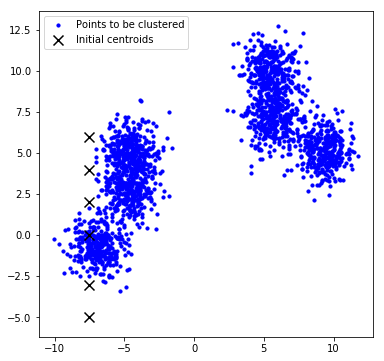

In [52]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', s=10, label='Points to be clustered')
plt.scatter(init_centroids[:, 0], init_centroids[:, 1],
            c='black', s=100, marker='x', label='Initial centroids')
plt.legend()
plt.savefig('6_blobs_initial')

plt.show()

Standardni K-Means

In [53]:
est = KMESA(k_clusters=6,
             n_init=1,
             init_centroids=init_centroids,
             simulated_annealing_on=False,
             convergence_tracking=True,
             )
est.print_details()

--------------- Algorithm details ---------------
    * Type: Standard K-Means
    * Number of clusters (k): 6
    * Centroid initialization method: random (ignored)
    * Initial centroids (specified): True
    * Number of initialization repetition: 1
    * Maximum iterations: 300
    * Convergence tolerance: 0.0001
    * Empty clusters resolution method: random
    * Convergence tracking: True
    * ECR tracking: False
    * Tracking scaler: None
-------------------------------------------------


------------- KMESA clustering -------------
    * Iterations before convergence: 83
    * Total empty cluster resolutions: 1
    * Total annealings: 128
    * Sum of squared error:  3.7e+03
    * Time elapsed: 5s 855ms
 ---------------------------------------------


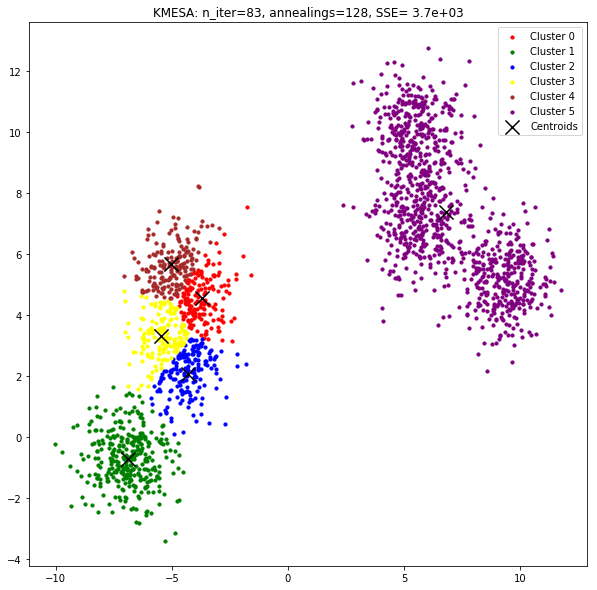

In [62]:
est.fit(X)
est.print_clustering_info()
est.plot_clustered_data(X, out_file='K-Means_6_blobs_v2_fail')

df['label'] = est.labels_

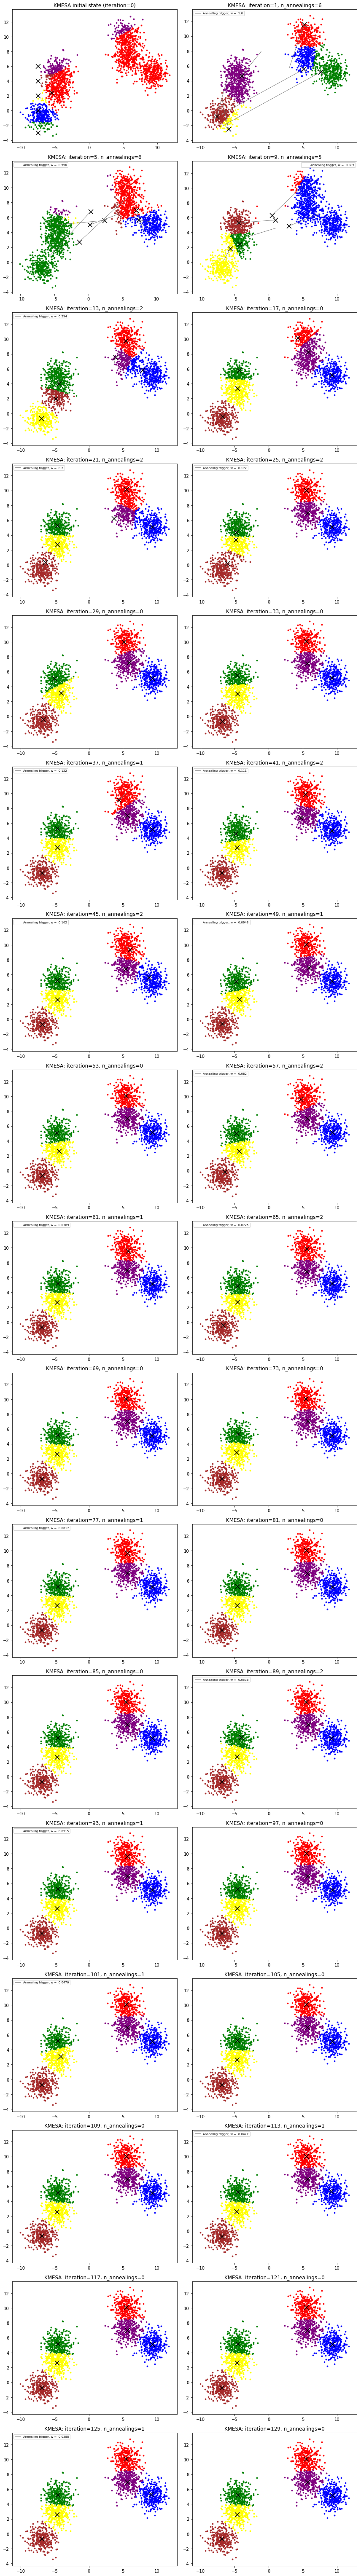

In [58]:
est.plot_tracking_history(X, show_iter_mod=4, show_cc_labels=False, out_file='K-Means, 6_blobs error')

--------------- Algorithm details ---------------
    * Type: KMESA
    * Number of clusters (k): 6
    * Centroid initialization method: random (ignored)
    * Initial centroids (specified): True
    * Number of initialization repetition: 1
    * Maximum iterations: 300
    * Convergence tolerance: 0.001
    * Empty clusters resolution method: random
    * Annealing method: cluster_other
    * Annealing probability function: recip
    * Annealing probability alpha: 8
    * Annealing weight function: sigmoid
    * Annealing weight beta: 5
    * Convergence tracking: True
    * Annealing tracking: True
    * ECR tracking: False
    * Tracking scaler: None
-------------------------------------------------


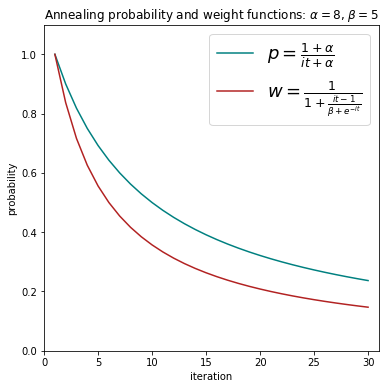

In [55]:
est = KMESA(k_clusters=6,
             n_init=1,
             init_centroids=init_centroids,
             tol=1e-3,
             annealing_method='cluster_other',
             annealing_prob_function='recip',
             alpha=8,
             annealing_weight_function='sigmoid',
             beta=5,
             convergence_tracking=True,
             annealing_tracking=True
             )
est.print_details()
est.plot_annealing_functions()

------------- KMESA clustering -------------
    * Iterations before convergence: 129
    * Total empty cluster resolutions: 3
    * Total annealings: 146
    * Sum of squared error:  2.33e+03
    * Time elapsed: 6s 238ms
 ---------------------------------------------


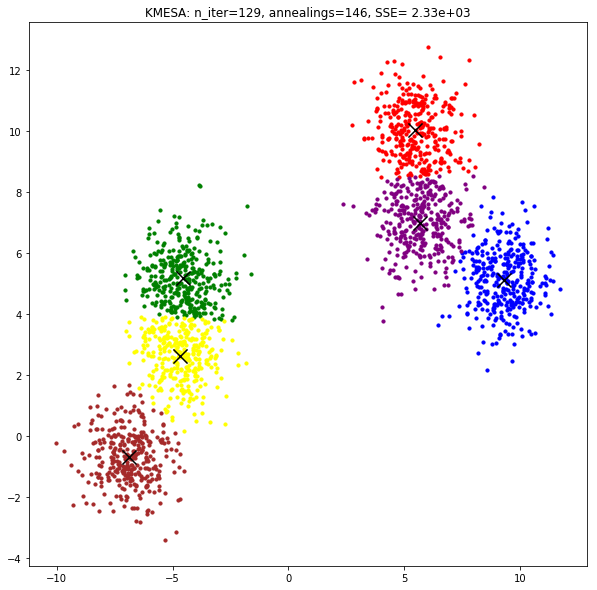

In [56]:
est.fit(X)
est.print_clustering_info()
est.plot_clustered_data(X, show_cc_labels=False)

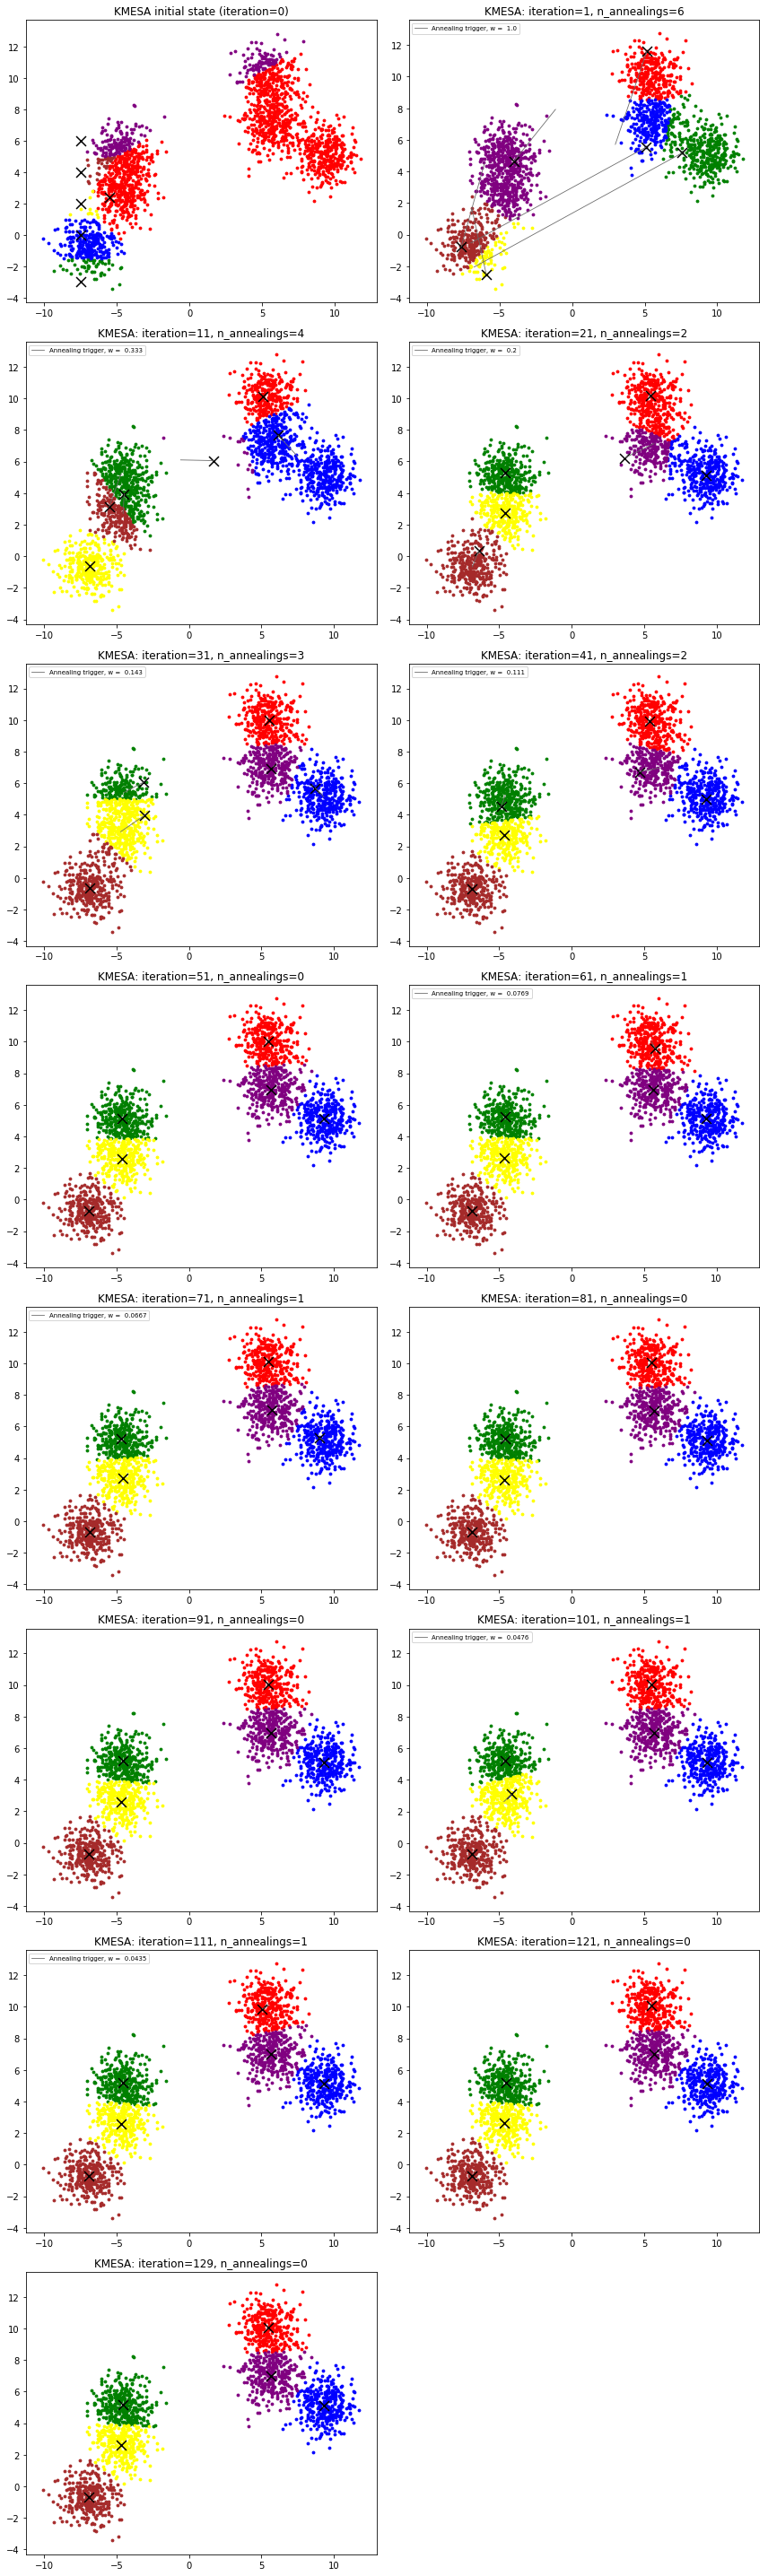

In [57]:
est.plot_tracking_history(X,
                          show_iter_mod=10,
                          show_cc_labels=False,
                          out_file='KMESA, 6_blobs, a_method=cluster_other')

KMESA, Maxmin annealing

--------------- Algorithm details ---------------
    * Type: KMESA
    * Number of clusters (k): 6
    * Centroid initialization method: random (ignored)
    * Initial centroids (specified): True
    * Number of initialization repetition: 1
    * Maximum iterations: 300
    * Convergence tolerance: 0.001
    * Empty clusters resolution method: random
    * Annealing method: maxmin
    * Annealing probability function: recip
    * Annealing probability alpha: 8
    * Annealing weight function: sigmoid
    * Annealing weight beta: 5
    * Convergence tracking: True
    * Annealing tracking: True
    * ECR tracking: False
    * Tracking scaler: None
-------------------------------------------------


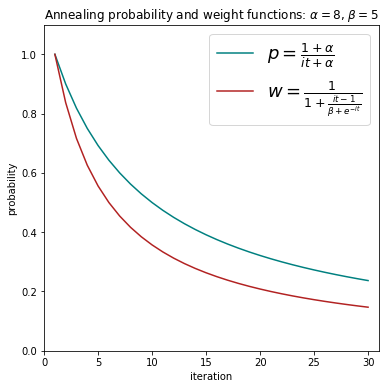

In [59]:
est = KMESA(k_clusters=6,
             n_init=1,
             init_centroids=init_centroids,
             tol=1e-3,
             annealing_method='maxmin',
             annealing_prob_function='recip',
             alpha=8,
             annealing_weight_function='sigmoid',
             beta=5,
             convergence_tracking=True,
             annealing_tracking=True
             )
est.print_details()
est.plot_annealing_functions()

------------- KMESA clustering -------------
    * Iterations before convergence: 83
    * Total empty cluster resolutions: 1
    * Total annealings: 138
    * Sum of squared error:  3.71e+03
    * Time elapsed: 6s 20ms
 ---------------------------------------------


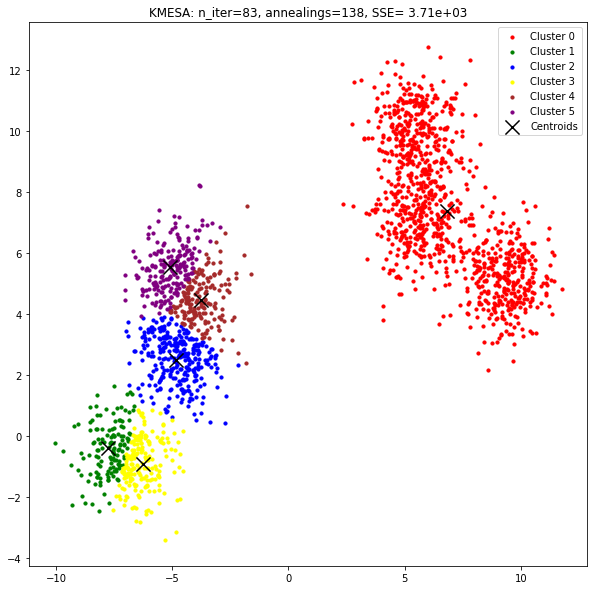

In [61]:
est.fit(X)
est.print_clustering_info()
est.plot_clustered_data(X, out_file='KMESA_a_method=maxmin_6_blobs_fail')